## Reed-Frost model  and stochastic discrete time epidemics

The Reed-Frost model is one of the first models of epidemics that serves as a foundation for many more complicated models of how an outbreak evolves over time.

The Reed-Frost (RF model assumes individuals can belong to one of three different states: Susceptible (S), Infectious (I), or Recovered and immune (R).
Individuals can move between these three different states over a series of discrete time steps.
Susceptible individuals move to the infectious group with a specific probability and all those who are infectious within one time step become recovered (and immune). 

The best part of the Reed-Frost model is that it involves almost everything we've learned in PHDS-I up to this point. 

## Probability of infection

The RF model assumes that those who are infectious---those who belong to the I state---infect individuals in the susceptible state with the same probability $p$. 
During each time step, the RF model also assumes every infectious individual comes into contact with every susceptible individual---the more infectious individuals the harder it is to stay susceptible. 

The way the RF model defines this is as follows. 
Suppose there is a single infectious individual.
The probability a susceptible individual becomes infected is then

\begin{align}
    p(\text{Susceptible becomes infected after one exposure}) = p
\end{align}

and the probability they remain susceptible is

\begin{align}
    p(\text{Remained susceptible after one exposure}) = (1-p)
\end{align}

Now suppose there are two infected individuals. 
A susceptible individual remain susceptible is if both the first and the second infectious individual do not infect them.

\begin{align}
    p(\text{Remained susceptible after two exposures}) = (1-p)^{2}
\end{align}

The RF model assumes that the probabilities that each individual infects a susceptible are **independent**.
By definition

\begin{align}
    p(\text{second person infects susceptible} | \text{first person infects susceptible}) &= p \\
        & = p(\text{second person infects susceptible}) 
\end{align}

Then the probability at least one of the infected individuals did successfully infect this susceptible individual is if the susceptible individual did not remain susceptible or 

\begin{align}
    p(\text{At least one infected a susceptible}) = 1 - (1-p)^{2}
\end{align}

Now suppose that there are $I$ infected individuals. 
Then the probability that at least one of the $I$ infected individuals infects a susceptible is 

\begin{align}
    p(\text{At least one of the I infected infects a susceptible}) = 1 - (1-p)^{I}
\end{align}

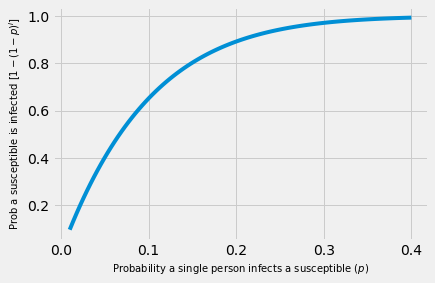

In [27]:
def susceptibleIsInfected(NumberInfected, probOfInfection):
    return 1 - (1- probOfInfection)**NumberInfected

probOfInfection = np.linspace(0.01,0.40,100)
NumberInfected = 10

probs_SusceptibleIsInfected = []
for prob in probOfInfection:
    probSusceptibleIsInfected = susceptibleIsInfected(NumberInfected, prob)
    probs_SusceptibleIsInfected.append( probSusceptibleIsInfected )

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()

ax.plot( probOfInfection, probs_SusceptibleIsInfected )

ax.set_xlabel(r"Probability a single person infects a susceptible ($p$)",fontsize=10)
ax.set_ylabel(r"Prob a susceptible is infected $[1 - (1-p)^{I}]$",fontsize=10)

plt.show()

As the probability a single person infects a susceptible increases, the probability a susceptible is infected by one of 10 infected individuals increases. The rate of increase is more dramatic between $p$s of 0.01 and 0.2 and after the rate of increases of the probability tapers off---getting very close to 1. 


### TL;DR Successive vs simultaneous contact and infection
An interesting consequence of the above is that the probability a single infected individual infects a susceptible over $I$ time steps is the same as the probability $I$ individuals infect a susceptible in a single time step.  

## Chain binomial models

### Formally define the Reed-Frost model

The Reed-Frost model is the following stochastic process:

\begin{align}
    I_{t+1} &= \text{Bin}\left( S_{t}, 1 - (1-p)^{I_{t}} \right)\\
    S_{t+1} &= S_{t} - I_{t+1}\\
    R_{t+1} &= R_{t} + I_{t}\\
\end{align}
The number of infected individuals at the next time step ($t+1$) depends on the number of susceptible and infected individuals at time $t$ and on the probability a single infected individual infects a susceptible $(p)$.
The number of infected individuals at time $t+1$ is a sample from a Binomial distribution and is the only random component in the model. 
The number of susceptible individuals is decremented by the number of infected individuals and all infected individuals at time $t$ recover within one time step.

### Simulate and intuition

Lets gain some intuition by coding up this model and simulating some time steps. 

#### Define a function that computes the $I_{t}$

In [28]:
def IAtTPlus1(S,I,p):
    # we can use our previous function
    probOfInfectingASusceptible = susceptibleIsInfected(NumberInfected=I,probOfInfection=p) 
    # return a single sample from a binomial dist
    return np.random.binomial(S,probOfInfectingASusceptible)

#### Define a function for S

In [29]:
def SAtTPlus1(S,IatTPlus1):
    return S - IatTPlus1

#### Define a function for R

In [30]:
def RAtTPlus1(R,I):
    return R+I

#### The simulation

In [31]:
numberOfTimeSteps = 20
p = 0.05

Is = [1]
Ss = [100]
Rs = [0]

for t in np.arange(0,numberOfTimeSteps):
    # at previous time step
    St = Ss[t]
    It = Is[t]
    Rt = Rs[t]
    
    #at the next time step
    Itp1 = IAtTPlus1(St,It,p)
    Stp1 = SAtTPlus1(St,Itp1)
    Rtp1 = RAtTPlus1(Rt,It)
    
    # collect data
    Is.append(Itp1)
    Ss.append(Stp1)
    Rs.append(Rtp1)

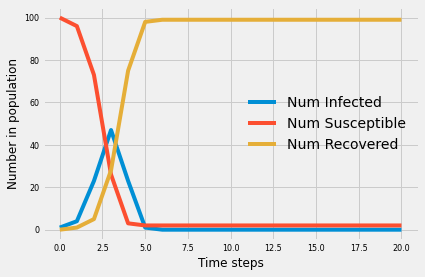

In [32]:
fig,ax = plt.subplots()

ax.plot(Is, label = "Num Infected")
ax.plot(Ss, label = "Num Susceptible")
ax.plot(Rs, label = "Num Recovered")

ax.legend(frameon=False)

ax.set_xlabel("Time steps", fontsize=12)
ax.set_ylabel("Number in population", fontsize=12)

ax.tick_params(which="both",labelsize=8.)


### Many simulations to examine the trajectory of I



### R naught and criticality